In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# DataSet
data = pd.read_csv('seaLevel.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    266 non-null    object 
 1   GMSL    266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [11]:
# Head values
data.head()

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [12]:
# Descriptive statistics
data.describe()

,GMSL
count,266.000000
mean,36.028571
std,20.889803
min,-3.500000
25%,20.525000
50%,36.700000
75%,52.500000
max,79.500000


In [13]:
# Converted the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

In [14]:
# Converted dates to the number of days since the starting point
start_date = data['Time'].min()
data['days_since_start'] = (data['Time'] - start_date).dt.days

In [15]:
# Prepare the data for regression
X = data['days_since_start'].values.reshape(-1, 1)
y = data['GMSL'].values

In [16]:
# Check the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (266, 1)
Shape of y: (266,)


In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# shape of training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (212, 1)
Shape of X_test: (54, 1)
Shape of y_train: (212,)
Shape of y_test: (54,)


In [19]:
# Created and trained the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions using the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [22]:
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R-squared: {test_r2}")

Training Mean Squared Error: 11.08334208310888
Training R-squared: 0.974533567064159
Testing Mean Squared Error: 12.272305918447602
Testing R-squared: 0.9716414305413911


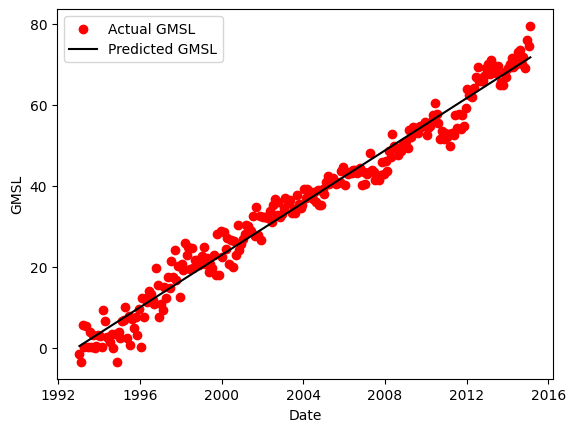

In [23]:
# Plot the results
plt.scatter(data['Time'], y, color='red', label='Actual GMSL')
plt.plot(data['Time'], model.predict(X), color='black', label='Predicted GMSL')
plt.xlabel('Date')
plt.ylabel('GMSL')
plt.legend()
plt.show()

In [50]:
# Now Predicting: What will be SEA LEVEL in 2050

In [24]:
# Calculate the number of days from the start date to 2050
future_date = pd.to_datetime('2050-01-01')
days_since_start_2050 = (future_date - start_date).days

In [25]:
# Predict the sea level for 2050
X_future = np.array([[days_since_start_2050]])
y_future_pred = model.predict(X_future)
print(f"Predicted GMSL for 2050: {y_future_pred[0]}")

Predicted GMSL for 2050: 184.35827269018523


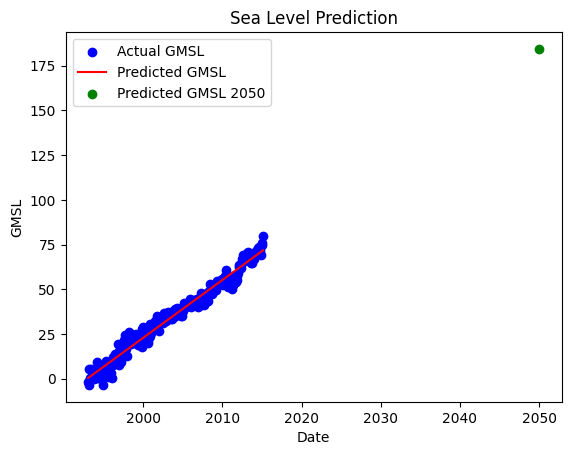

In [26]:
# Plot the historical data and the prediction for 2050
plt.scatter(data['Time'], y, color='blue', label='Actual GMSL')
plt.plot(data['Time'], model.predict(X), color='red', label='Predicted GMSL')
plt.scatter(future_date, y_future_pred, color='green', label='Predicted GMSL 2050')
plt.xlabel('Date')
plt.ylabel('GMSL')
plt.legend()
plt.title('Sea Level Prediction')
plt.show()